In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Stochastic Volatility Model

Transition model:
$$ X_k = aX_{k-1} + bW_k$$
Observation model:
$$ Y_k =ce^{X_k/2}V_k$$
where $X_{-1} = 0$, $W_k \sim N(0,1)$ and $Y_k \sim N(0,1)$

In [114]:
def generateVolatility(a, b, c, length):
    x = np.zeros(length)
    y = np.zeros(length)
    
    current_x = 0
    for ind in range(length):
        w,v = np.random.randn(), np.random.randn()
        current_x = a * current_x + b * w
        x[ind] = current_x
        y[ind] = c * np.exp(current_x / 2.) * v
        
    return x, y

In [115]:
def particleFilter(a, b, c, y, num_samples):
    particles = np.random.randn(num_samples,2)

    weights = norm.pdf(y[0] / (np.exp(particles[:,0] / 2.0) * c))
    particles[:,1] = weights
    res = np.zeros(len(y))
    
    for ind in range(len(y) - 1):
        res[ind] = np.dot(particles[:,0], particles[:,1]) / np.sum(particles[:,1])
        chosen = np.random.choice(list(range(num_samples)), size = num_samples, p = particles[:,1] / np.sum(particles[:,1]))
        
        # Resampling
        particles[:,0] = np.take(particles[:,0], chosen, axis = 0)
        particles[:,1] = np.ones(num_samples) * np.sum(particles[:,1]) / num_samples
        
        # Propagation
        particles[:,0] = particles[:,0] * a + b * np.random.randn(num_samples)
        particles[:,1] = norm.pdf(y[ind + 1] / (c * np.exp(particles[:,0] / 2)))
    
    return res
    
    

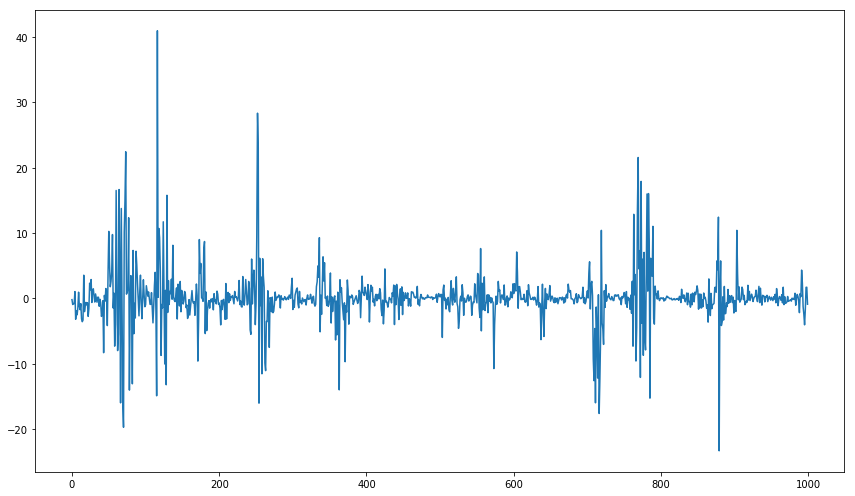

In [116]:
a, b, c = 0.9, 1, 1
x, y = generateVolatility(a,b,c, 1000)
particles = particleFilter(a, b, c, y, 1000)
fig = plt.gcf()
fig.set_size_inches(14.5, 8.5)
plt.plot(y)
plt.show()

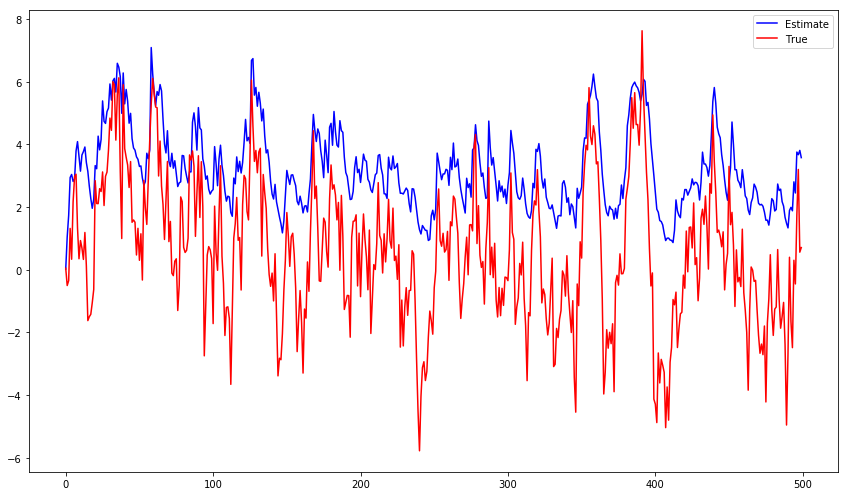

In [117]:
fig = plt.gcf()
fig.set_size_inches(14.5, 8.5)
plt.plot(particles[::2], 'b', label = 'Estimate')
plt.plot(x[::2], 'r', label = 'True')
plt.legend()
plt.show()

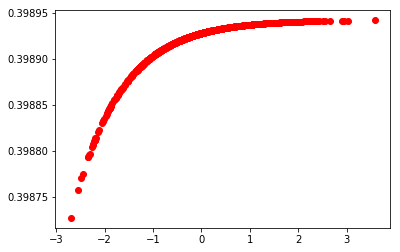

In [41]:
plt.plot(particles[:,0], particles[:,1], 'ro')

In [62]:
particles

array([[-0.28688178,  0.1317768 ],
       [-0.17821132,  0.1317768 ],
       [ 0.45399392,  0.1317768 ],
       ...,
       [ 0.15849939,  0.1317768 ],
       [-0.0348378 ,  0.1317768 ],
       [ 0.21856011,  0.1317768 ]])

In [49]:
np.dot(particles[:,0], particles[:,1])/ len(particles)

0.00214676859845621

In [54]:
np.take(np.array([[0,1], [2,3]]), np.array([0,1,0,1]), axis = 0)

array([[0, 1],
       [2, 3],
       [0, 1],
       [2, 3]])